In [3]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator
from nelpy.analysis import time_swap_array, trajectory_score_array


In [18]:
def run_sim():
    pval = []
    for _ in range(250):
        x = np.array(
            [
                [0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0],
                [1, 0, 0, 0, 0],
                [0, 1, 0, 0, 0],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [0, 0, 0, 1, 0],
                [0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0],
            ]
        )
        noise = np.random.rand(np.array(x).shape[0], np.array(x).shape[1]) * 0.1
        x = x + noise

        shuffled_scores = [
            trajectory_score_array(time_swap_array(x)) for _ in range(1000)
        ]
        scores = trajectory_score_array(x)

        _, pval_, std = functions.get_significant_events(
            scores, np.array(shuffled_scores)
        )
        pval.append(pval_)
    return pval

pval = run_sim()


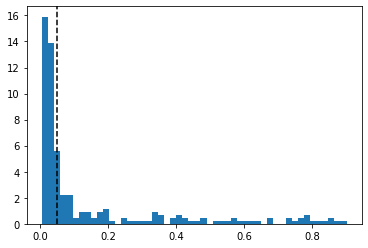

In [5]:
plt.hist(np.vstack(pval),50,density=True)
plt.axvline(.05,color="k",linestyle="--")
plt.show()

In [22]:
def run_sim(n_shuffle=1000):
    pval = []
    for _ in range(250):
        x = np.array(
            [
                [0, 0, 0, 0],
                [1, 0, 0, 0],
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0, 0, 0, 0],
            ]
        )
        noise = np.random.rand(np.array(x).shape[0], np.array(x).shape[1]) * 0.1
        x = x + noise

        shuffled_scores = [
            trajectory_score_array(time_swap_array(x)) for _ in range(n_shuffle)
        ]
        scores = trajectory_score_array(x)

        _, pval_, std = functions.get_significant_events(
            scores, np.array(shuffled_scores)
        )
        pval.append(pval_)

    return pval

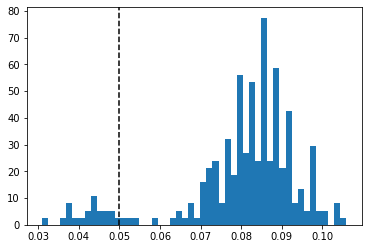

In [20]:
pval = run_sim(n_shuffle=1000)
plt.hist(np.vstack(pval),50,density=True)
plt.axvline(.05,color="k",linestyle="--")
plt.show()

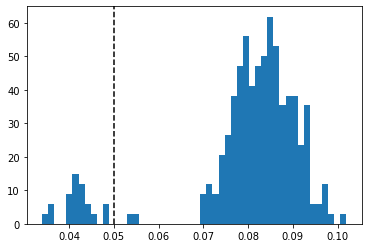

In [23]:
pval = run_sim(n_shuffle=2000)
plt.hist(np.vstack(pval),50,density=True)
plt.axvline(.05,color="k",linestyle="--")
plt.show()

In [26]:
def run_sim(n_shuffle=1000):
    pval = []
    for _ in range(250):
        x = np.array(
            [
                [0, 0, 0, 0],
                [1, 0, 0, 0],
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0, 0, 0, 0],
            ]
        )
        noise = np.random.rand(np.array(x).shape[0], np.array(x).shape[1]) * 0.1
        x = x + noise

        shuffled_scores = [
            trajectory_score_array(time_swap_array(x)) for _ in range(n_shuffle)
        ]
        scores = trajectory_score_array(x)

        _, pval, std = functions.get_significant_events(
            scores, np.array(shuffled_scores)
        )
        if np.array(pval) < 0.05:
            return x, pval, std, shuffled_scores


x, pval, std, shuffled_scores = run_sim(n_shuffle=2000)


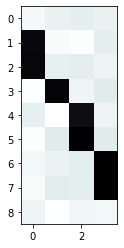

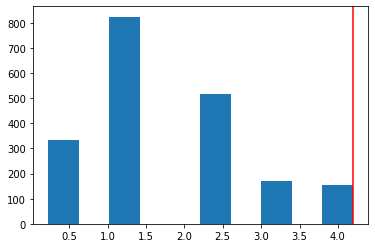

In [32]:
plt.imshow(x,cmap="bone_r")
plt.show()
plt.hist(shuffled_scores)
plt.axvline(trajectory_score_array(x),color="r")
plt.show()

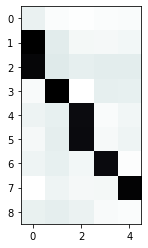

In [21]:
x = np.array([[0,0,0,0,0], [1,0,0,0,0], [1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[0,0,0,0,0]])
noise = np.random.rand(np.array(x).shape[0], np.array(x).shape[1]) * 0.1
x = x + noise
plt.imshow(x,cmap="bone_r")